In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet                                                                                                                    # IGNORE_COPYRIGHT: cleared by OSS licensing
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Transfer Learning on Large Scale RGB datasets using InceptionV3

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/transfer_learning_on_large_scale"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/transfer_learning_on_large_scale.ipynb?force_kitty_mode=1&force_corgi_mode=1"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/transfer_learning_on_large_scale.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/transfer_learning_on_large_scale.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Transfer Learning with InceptionV3 and LFW Dataset - Beginner Tutorial

### Introduction to Transfer Learning

In this beginner tutorial, we will delve into the fascinating world of transfer learning and harness the power of the InceptionV3 model to classify images from the LFW (Labeled Faces in the Wild) dataset. Transfer learning is a technique that allows us to reuse knowledge from a pre-trained model and apply it to a new, similar task, saving valuable time and resources.

### Understanding InceptionV3

InceptionV3 is a deep convolutional neural network architecture developed by Google. It is designed to excel at image recognition tasks and has been trained on a large-scale image-classification dataset. The model's architecture is based on the concept of "inception modules," which allow it to capture features at multiple spatial scales.

The architecture's depth and complexity enable InceptionV3 to learn hierarchical representations of images, making it a powerful feature extractor. We will take advantage of these learned features through transfer learning to classify images in the LFW dataset effectively.

### About the LFW Dataset

The Labeled Faces in the Wild (LFW) dataset is a popular benchmark for face recognition tasks. It contains more than 13,000 labeled images of faces, collected from the internet under real-world conditions. The dataset covers a wide range of variations in pose, lighting, expression, and background, making it a challenging and diverse dataset for face-related tasks.

We will employ transfer learning with InceptionV3 to perform image classification on the LFW dataset, demonstrating how a pre-trained model can be adapted to handle a different but related task.

### Two Approaches to Transfer Learning

1. **Feature Extraction:**
   In the feature extraction approach, we leverage the pre-trained InceptionV3 model to extract meaningful features from the LFW dataset. By adding a new classifier on top of the pre-trained model and training only this new classifier, we can reuse the knowledge captured by InceptionV3. This approach is particularly useful when computational resources are limited, as we don't need to retrain the entire model.

2. **Fine-Tuning:**
   Fine-tuning allows us to take transfer learning a step further. We unfreeze some of the top layers of the InceptionV3 model and jointly train both the new classifier layers and the last layers of the base model. This process fine-tunes the higher-order feature representations in InceptionV3, making them more specific and relevant for classifying images in the LFW dataset.

### The Learning Journey

Throughout this tutorial, we will follow these steps:

1. Explore and understand the LFW dataset.
2. Build an input pipeline using Keras ImageDataGenerator for efficient data feeding.
3. Compose the transfer learning model:
   - Load the pre-trained InceptionV3 base model along with its pre-trained weights.
   - Customize the model with new classification layers for our LFW dataset.
4. Train the model on the LFW dataset, allowing it to learn to recognize faces effectively.
5. Evaluate the model's performance on the LFW dataset to gauge its accuracy.

By the end of this tutorial, you will have gained a comprehensive understanding of transfer learning, successfully applied InceptionV3 to a practical image classification task, and obtained valuable insights into the fascinating world of deep learning.

Now, let's embark on this exciting journey of transfer learning with TensorFlow and InceptionV3, and uncover the potential of combining pre-trained models with real-world datasets!

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import InceptionV3

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## Loading the data and preprocessing

In the next step, we will download the LFW dataset, extract the necessary data, and then proceed to plot some images.

These are the steps we will follow:
1. Downloads the LFW dataset and extracts the required data and labels.
2. Defines functions to display image details and plot images.
3. Calls the functions to display the details of the downloaded dataset and plot a selection of images.


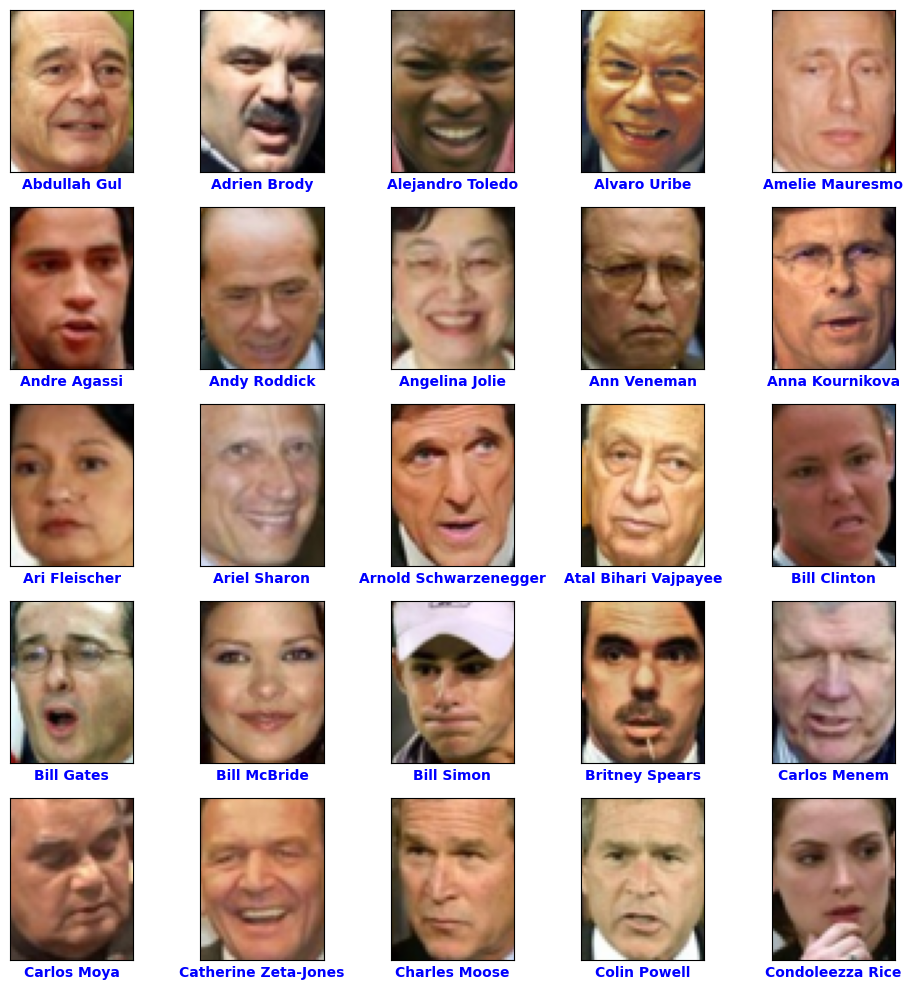

Shape of x (4324, 8742)
Shape of y (4324,)
Shape (4324, 62, 47, 3)
Size 37800408
target_name ['Abdullah Gul' 'Adrien Brody' 'Alejandro Toledo' 'Alvaro Uribe'
 'Amelie Mauresmo'] ... 153 more names are in the target_names array


In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=10, download_if_missing=True, color=True)

x = lfw_people.data
y = lfw_people.target
x_images = lfw_people.images
y_labels = lfw_people.target_names

# image details
def image_details():
    images_details = {
        "Shape of x": x.shape,
        "Shape of y": y.shape,
        "Shape": lfw_people.images.shape,
        "Size": lfw_people.images.size,
        "target_name": lfw_people.target_names,
    }

    for k, v in images_details.items():
        if k == "target_name":
            print(k, v[:5], '...', len(v) - 5, 'more names are in the target_names array')
        else:
            print(k, v)

# image plots
def image_plots(x, y):
    fig, ax = plt.subplots(5, 5, figsize=(10, 10))
    for i, axi in enumerate(ax.flat):
        axi.imshow(x[i].reshape(62, 47, 3), cmap=plt.cm.binary)
        axi.set(xticks=[], yticks=[])
        axi.set_xlabel(y_labels[i], fontsize=10, fontweight='bold', color='blue')

    plt.tight_layout()
    plt.show()

image_plots(x_images,y_labels)
image_details()


Now, we have the data at our disposal and can explore the LFW dataset by visualizing some of its images. The `image_details()` function will show us information about the dataset, and the `image_plots()` function will display a grid of sample images along with their corresponding labels.

## Upscaling the images and performing train test split

In the next stage, we will split the data into training and testing sets. Additionally, we will upscale the images to match the required dimensions of the InceptionV3 model (150x150).


These are the steps we will follow:
1. Reshapes the original data `x` to match the image dimensions (62x47x3).
2. Upscales the images to the required dimensions of 150x150 using the OpenCV library.
3. Splits the data into training (`x_train`, `y_train`) and testing (`x_test`, `y_test`) sets, with a test size of 25% and a random state for reproducibility.
4. Displays the number of samples, height, width, and color channels of the training data.

Now we have successfully split the data and prepared the images in the required format for feeding into the InceptionV3 model during the training process.

Resizing the images to 150x150 with 3 color channels (RGB) ensures compatibility with InceptionV3's input requirements, and the interpolation method (cv2.INTER_LINEAR) helps maintain the visual quality of the images during the upscaling process.


In [3]:
# split data into train and test
x = x.reshape(-1, 62, 47, 3)
print(x.shape)

# Upscale the images to 75x75 using OpenCV
upscaled_images = []
for image in x:
    upscaled_image = cv2.resize(image, (150, 150), interpolation=cv2.INTER_LINEAR)
    upscaled_images.append(upscaled_image)

x_upscaled = np.array(upscaled_images)

x_train, x_test, y_train, y_test = train_test_split(x_upscaled, y, test_size=0.25, random_state=758)
num_samples, height, width, color = x_train.shape
print('Number of samples:', num_samples)
print('Height:', height)
print('Width:', width)
print('Color:', color)

(4324, 62, 47, 3)
Number of samples: 3243
Height: 150
Width: 150
Color: 3


## Next Steps

### 1. Data Augmentation

Data augmentation is a technique used to artificially expand the size of the training dataset by applying various transformations to the existing images. This process introduces additional variations, allowing the model to learn from a more diverse set of data and become more robust.

The `ImageDataGenerator` from TensorFlow's Keras API provides easy-to-use data augmentation functionalities. In the provided code segment, we apply a range of transformations, including rotation, width and height shifts, shearing, zooming, and horizontal flipping. These augmentations ensure that the model encounters different variations of the input images during training, leading to improved performance and better generalization.

### 2. Building the Transfer Learning Model

The `learn_model()` function is designed to create a transfer learning model based on the InceptionV3 architecture. We first load the InceptionV3 base model with pre-trained weights from the 'imagenet' dataset. By setting `trainable=False` for most layers in the base model **(except the top 50)**, we freeze these layers to retain their pre-trained knowledge during fine-tuning.

Next, we add custom layers on top of the InceptionV3 base model to adapt it to our face classification task. These additional layers include two convolutional layers with ReLU activation, a dropout layer to mitigate overfitting, a global average pooling layer, and a fully connected dense layer with a softmax activation for multi-class classification.

### 3. Compilation and Summary

After constructing the model, we compile it using the Adam optimizer with a specified learning rate. The loss function used is 'sparse_categorical_crossentropy', suitable for multi-class classification tasks with integer labels. The model is then ready for training.

Finally, we call the `model.summary()` function to display a summary of the model's architecture, showing the layers, shapes, and the number of trainable parameters.

By following this tutorial, you will gain practical experience in implementing transfer learning with data augmentation, a powerful combination to achieve state-of-the-art results on image classification tasks, even with limited data.

Now, let's proceed with training and evaluating the model on the LFW dataset to witness the remarkable impact of transfer learning and data augmentation in action!

In [4]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

def learn_model(input_shape, num_classes=len(np.unique(y)), dropout_rate=0.5, learning_rate=0.001):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape, )
    base_model.trainable = True
    for layer in base_model.layers[50:]:  # Unfreeze the top 50 layers
        layer.trainable = False


    model = tf.keras.models.Sequential([
        base_model,
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

## Training the Model


Now that we have built the transfer learning model with data augmentation, it's time to train the model on the LFW dataset. The following code segment shows how we train the model with data augmentation and early stopping:


In [5]:
# Create the model
model = learn_model((height, width, color))

# Train the model with data augmentation and early stopping
batch_size = 32
epochs = 100

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
validation_generator = (x_test, y_test)

history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=[early_stopping])


87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 conv2d_94 (Conv2D)          (None, 3, 3, 64)          1179712   
                                                                 
 dropout (Dropout)           (None, 3, 3, 64)          0         
                                                                 
 conv2d_95 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 158)               10

2023-08-01 04:17:13.078171: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


102/102 [==============================] - 56s 292ms/step - loss: 4.5297 - accuracy: 0.1576 - val_loss: 4.9207 - val_accuracy: 0.0777
Epoch 2/100
102/102 [==============================] - 25s 240ms/step - loss: 4.1466 - accuracy: 0.2057 - val_loss: 4.0323 - val_accuracy: 0.2285
Epoch 3/100
102/102 [==============================] - 24s 233ms/step - loss: 3.7697 - accuracy: 0.2479 - val_loss: 4.7194 - val_accuracy: 0.1943
Epoch 4/100
102/102 [==============================] - 25s 243ms/step - loss: 3.4201 - accuracy: 0.2969 - val_loss: 3.4980 - val_accuracy: 0.2729
Epoch 5/100
102/102 [==============================] - 25s 247ms/step - loss: 3.1290 - accuracy: 0.3281 - val_loss: 3.4181 - val_accuracy: 0.2951
Epoch 6/100
102/102 [==============================] - 25s 244ms/step - loss: 2.9575 - accuracy: 0.3383 - val_loss: 3.2486 - val_accuracy: 0.3154
Epoch 7/100
102/102 [==============================] - 25s 248ms/step - loss: 2.7155 - accuracy: 0.3827 - val_loss: 3.0729 - val_accurac

Now that we have built the transfer learning model with data augmentation, it's time to train the model on the LFW dataset. The following code segment shows how we train the model with data augmentation and early stopping:

34/34 [==============================] - 1s 30ms/step - loss: 1.1959 - accuracy: 0.7336
Test loss: 1.1958720684051514
Test accuracy: 0.7335799932479858


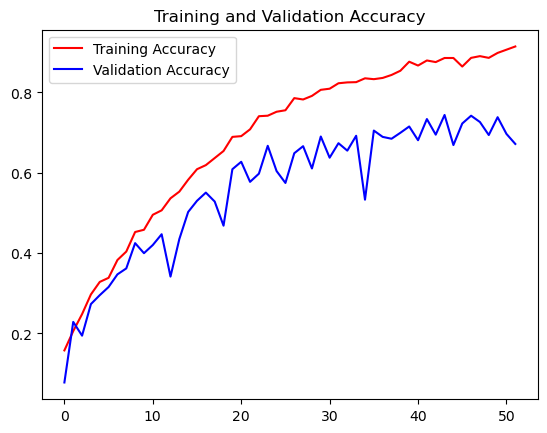

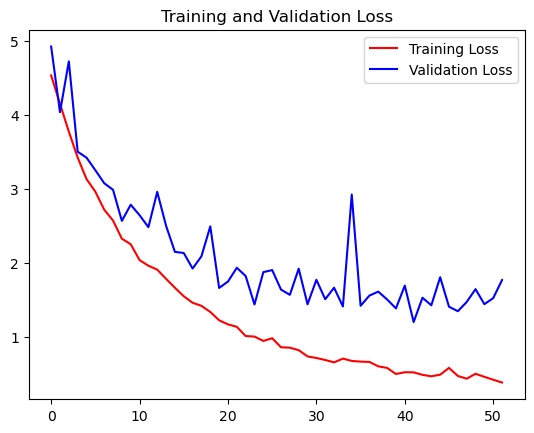

In [9]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Save the model and display the outputs of the model

34/34 [==============================] - 2s 25ms/step


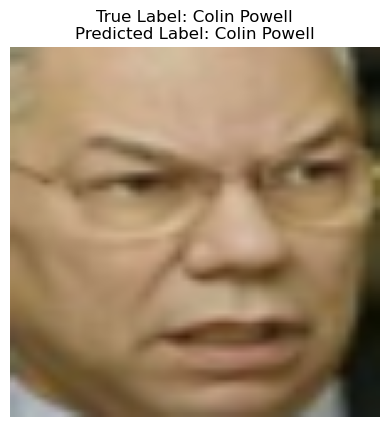

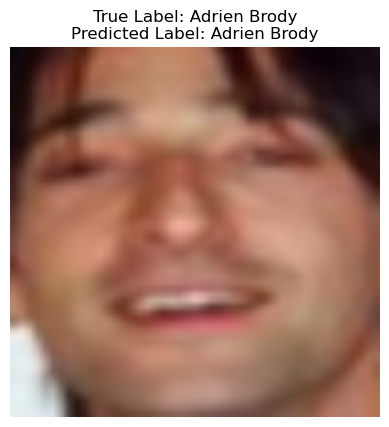

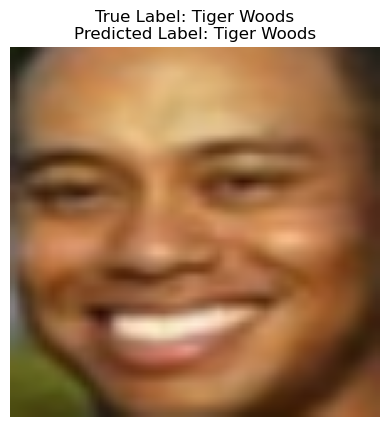

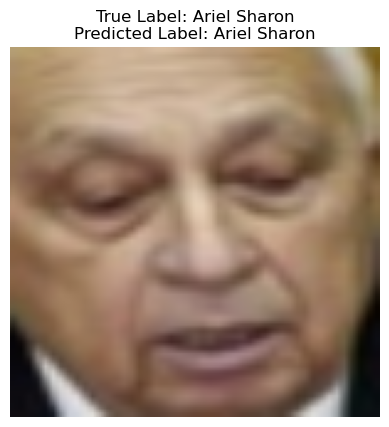

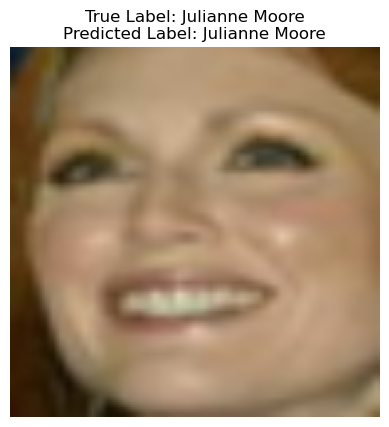

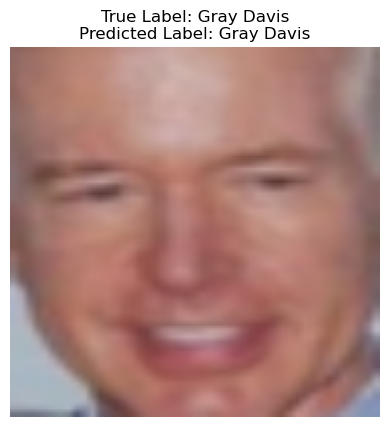

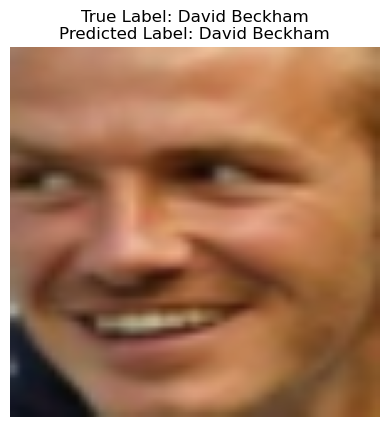

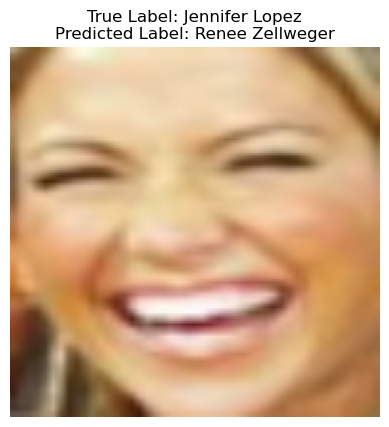

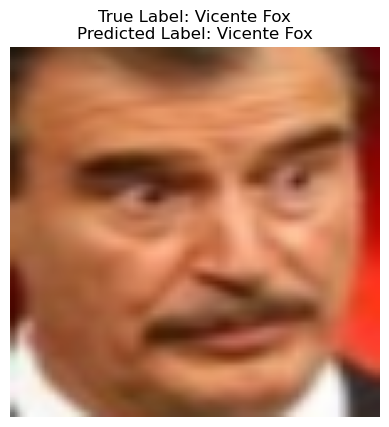

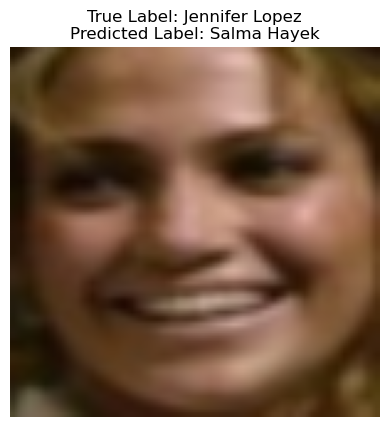

In [10]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Save the model to the Kaggle output directory
model.save('/kaggle/working/my_model.h5')

# Function to plot a sample image along with the true and predicted labels
def plot_sample_image(image, true_label, predicted_label):
    plt.imshow(image)
    plt.title(f"True Label: {lfw_people.target_names[true_label]}\nPredicted Label: {lfw_people.target_names[predicted_label]}")
    plt.axis('off')
    plt.show()

# Plot the first 10 sample images from the test set
for i in range(10):
    plot_sample_image(x_test[i], y_test[i], np.argmax(y_pred[i]))

## Checking how much the model the model is performing

In [11]:
# Initialize a counter for correct predictions
correct_count = 0

# Plot the first 10 sample images from the test set
for i in range(len(y_test)):
    true_label = y_test[i]
    predicted_label = np.argmax(y_pred[i])

    # Check if the prediction is correct
    if true_label == predicted_label:
        correct_count += 1

# Print the count of correctly classified images
print(f"Number of correctly classified images: {correct_count} out of {len(y_test)}")

Number of correctly classified images: 793 out of 1081
